In [1088]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [1089]:
# Load the data into a DataFrame
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [1090]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [1091]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


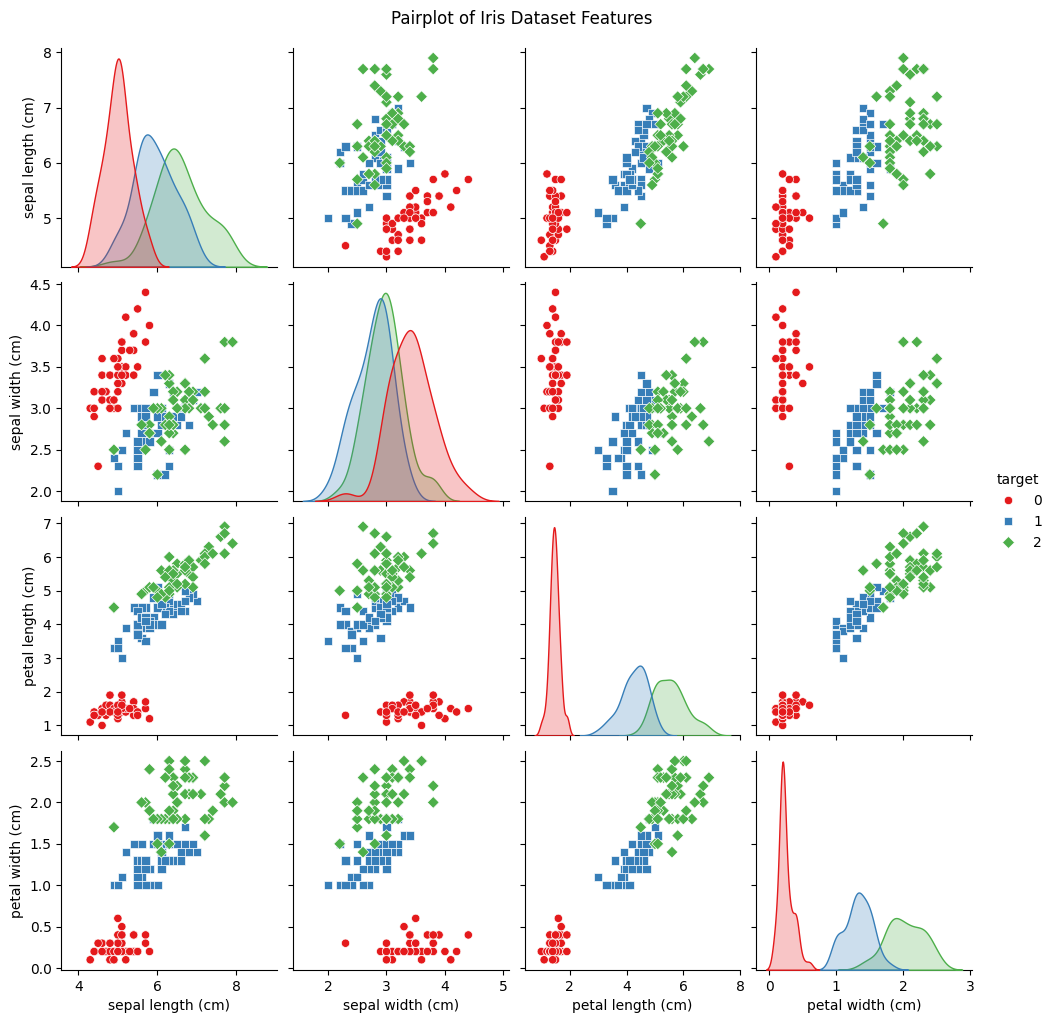

In [1092]:
# Pairplot to visualize the relationships between features
sns.pairplot(iris_df, hue='target', palette='Set1', markers=['o', 's', 'D'])
plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
plt.show()

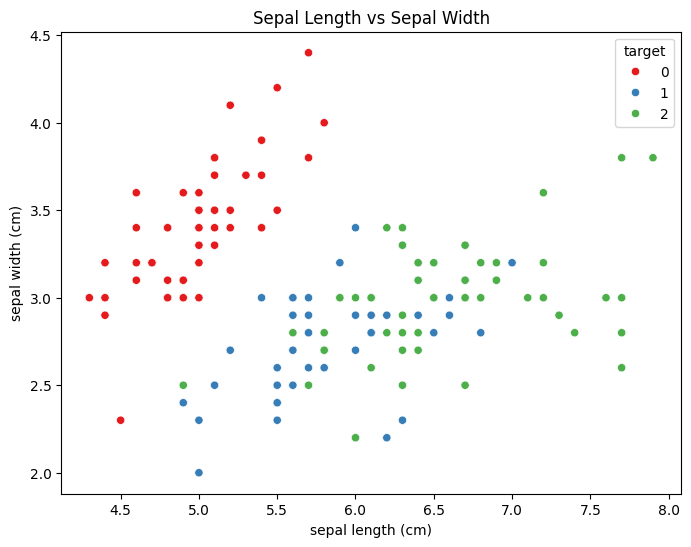

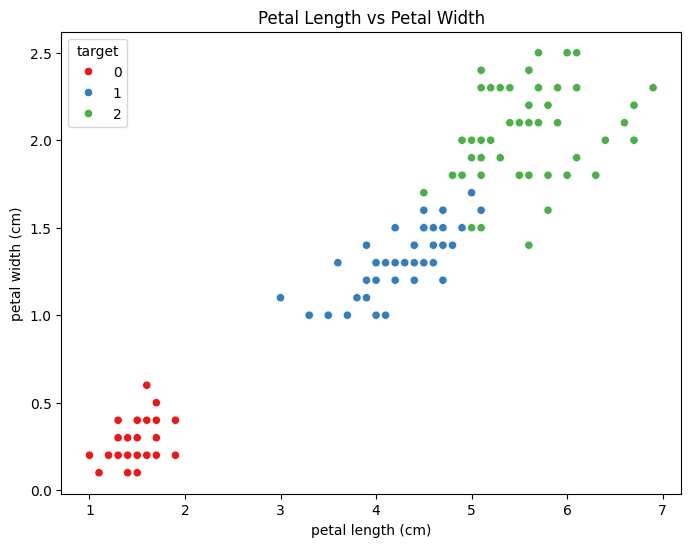

In [1093]:
# Visualizing 2D scatter plots for pairs of features
# Sepal Length vs Sepal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x=iris.feature_names[0], y=iris.feature_names[1], hue='target', palette='Set1')
plt.title('Sepal Length vs Sepal Width')
plt.show()

# Petal Length vs Petal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x=iris.feature_names[2], y=iris.feature_names[3], hue='target', palette='Set1')
plt.title('Petal Length vs Petal Width')
plt.show()

In [1094]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

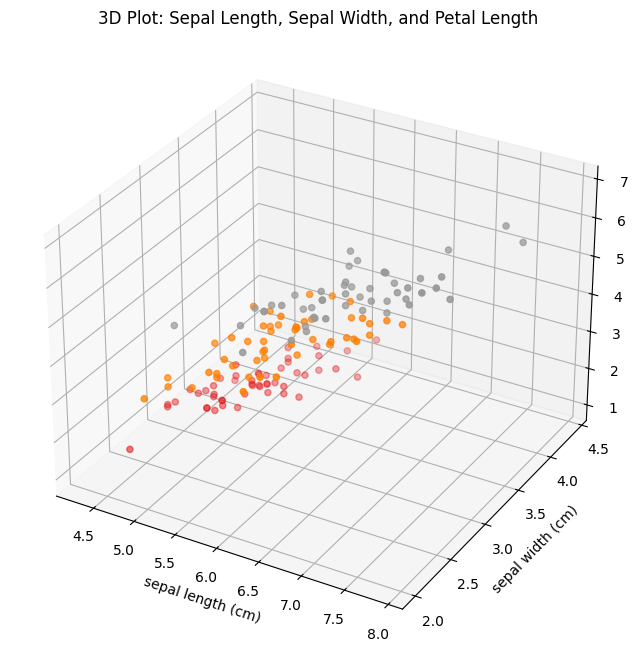

In [1095]:
# 3D plot for Sepal Length, Sepal Width, and Petal Length
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the points
scatter = ax.scatter(iris_df[iris.feature_names[0]], iris_df[iris.feature_names[1]], iris_df[iris.feature_names[2]],
                     c=iris_df['target'], cmap='Set1', marker='o')

# Adding labels
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
plt.title('3D Plot: Sepal Length, Sepal Width, and Petal Length')

# Show the plot
plt.show()

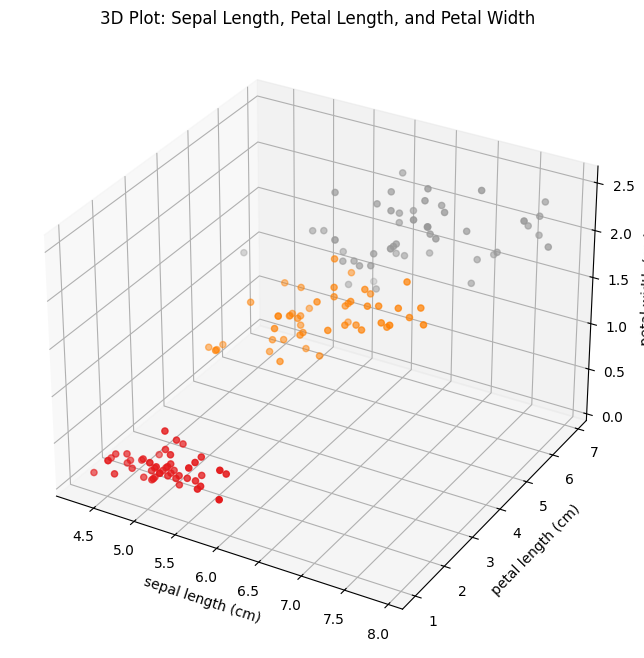

In [1096]:
# 3D plot for Sepal Length, Petal Length, and Petal Width
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the points
scatter = ax.scatter(iris_df[iris.feature_names[0]], iris_df[iris.feature_names[2]], iris_df[iris.feature_names[3]],
                     c=iris_df['target'], cmap='Set1', marker='o')

# Adding labels
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[2])
ax.set_zlabel(iris.feature_names[3])
plt.title('3D Plot: Sepal Length, Petal Length, and Petal Width')

# Show the plot
plt.show()

# Logistic Regression

In [1097]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    RocCurveDisplay,
)

In [1098]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [1099]:
def binary_classification(X, y, positive_class, class_name):
    y_binary = (y == positive_class).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "confusion_matrix": cm,
        "classification_report": classification_report(y_test, y_pred, target_names=["Not " + class_name, class_name]),
    }

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not " + class_name, class_name], yticklabels=["Not " + class_name, class_name])
    plt.title(f"Confusion Matrix: {class_name} vs Not {class_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot ROC curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC Curve: {class_name} vs Not {class_name}")
    plt.show()

    return metrics, model

In [1100]:
def plot_decision_boundary(X, y, model, positive_class, class_name, feature_x, feature_y):
    # Reduce to 2D (two selected features)
    X_2d = X[:, [feature_x, feature_y]]
    y_binary = (y == positive_class).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X_2d, y_binary, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    # Generate grid for decision boundary
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_binary, edgecolors="k", cmap="coolwarm")
    plt.title(f"Decision Boundary: {class_name} vs Not {class_name}")
    plt.xlabel(iris.feature_names[feature_x])
    plt.ylabel(iris.feature_names[feature_y])
    plt.show()

Classification: Setosa vs Not Setosa


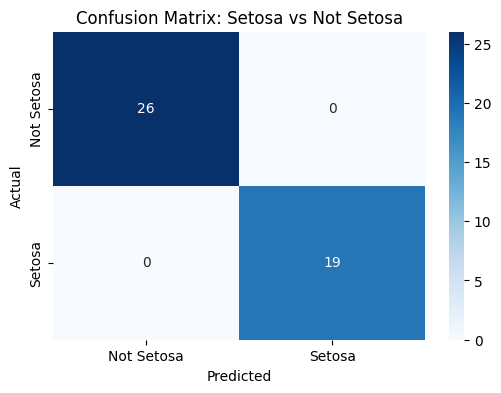

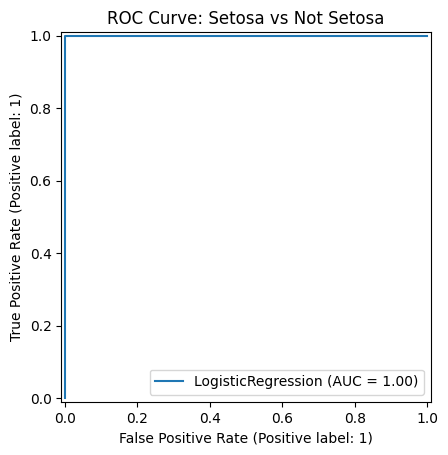

Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
[[26  0]
 [ 0 19]]
Classification Report:
              precision    recall  f1-score   support

  Not Setosa       1.00      1.00      1.00        26
      Setosa       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



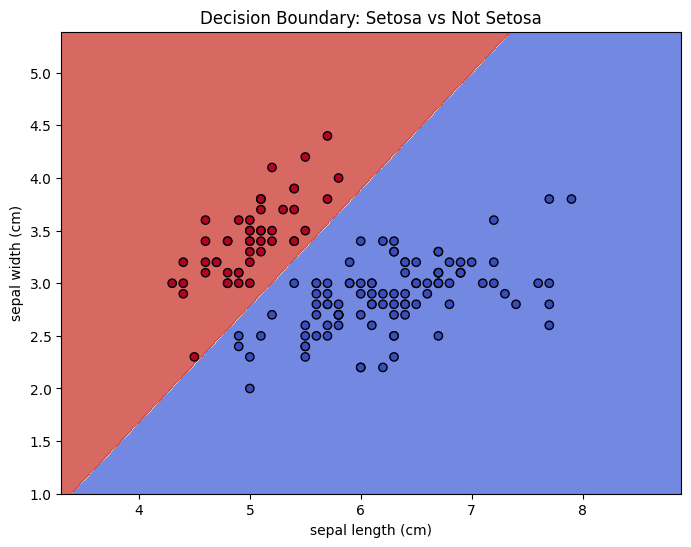

In [1101]:
print("Classification: Setosa vs Not Setosa")
setosa_metrics, setosa_model = binary_classification(X, y, positive_class=0, class_name="Setosa")
print(f"Accuracy: {setosa_metrics['accuracy']}")
print(f"F1 Score: {setosa_metrics['f1_score']}")
print("Confusion Matrix:")
print(setosa_metrics['confusion_matrix'])
print("Classification Report:")
print(setosa_metrics['classification_report'])

# Visualize decision boundary for Setosa vs Not Setosa (sepal length vs sepal width)
plot_decision_boundary(X, y, LogisticRegression(max_iter=1000), 0, "Setosa", 0, 1)


Classification: Virginica vs Not Virginica


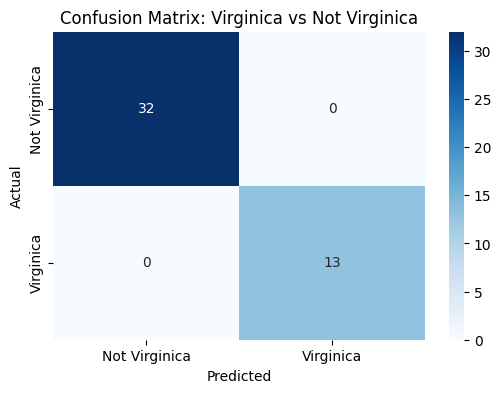

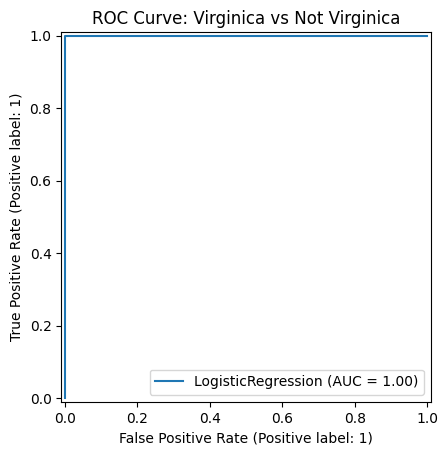

Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
[[32  0]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

Not Virginica       1.00      1.00      1.00        32
    Virginica       1.00      1.00      1.00        13

     accuracy                           1.00        45
    macro avg       1.00      1.00      1.00        45
 weighted avg       1.00      1.00      1.00        45



In [1102]:
print("\nClassification: Virginica vs Not Virginica")
virginica_metrics, virginica_model = binary_classification(X, y, positive_class=2, class_name="Virginica")
print(f"Accuracy: {virginica_metrics['accuracy']}")
print(f"F1 Score: {virginica_metrics['f1_score']}")
print("Confusion Matrix:")
print(virginica_metrics['confusion_matrix'])
print("Classification Report:")
print(virginica_metrics['classification_report'])

# Multiclass

In [1103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
X, y = data.data, data.target

Accuracy: 100.00%

Matriz de confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



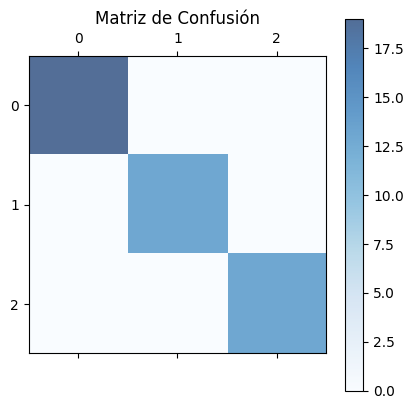

In [1104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=200).fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nMatriz de confusión:\n', conf_matrix)
print('\nReporte de clasificación:\n', class_report)

plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.show()

/home/oel/.venv/jupy3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


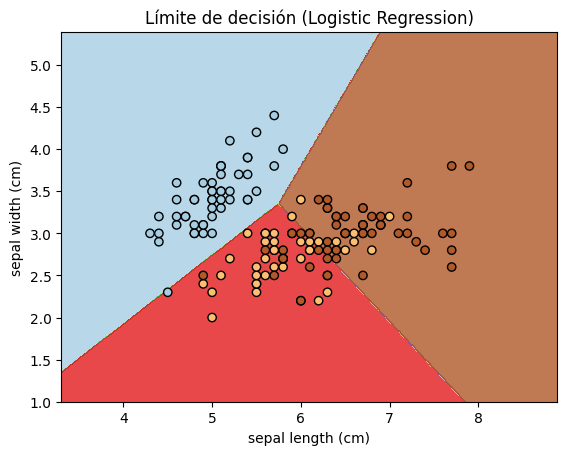

In [1105]:
X = X.iloc[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Límite de decisión (Logistic Regression)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

# SVM

In [1106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
X, y = data.data, data.target

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_kernel = None
best_accuracy = 0

/home/oel/.venv/jupy3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/oel/.venv/jupy3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/oel/.venv/jupy3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/oel/.venv/jupy3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


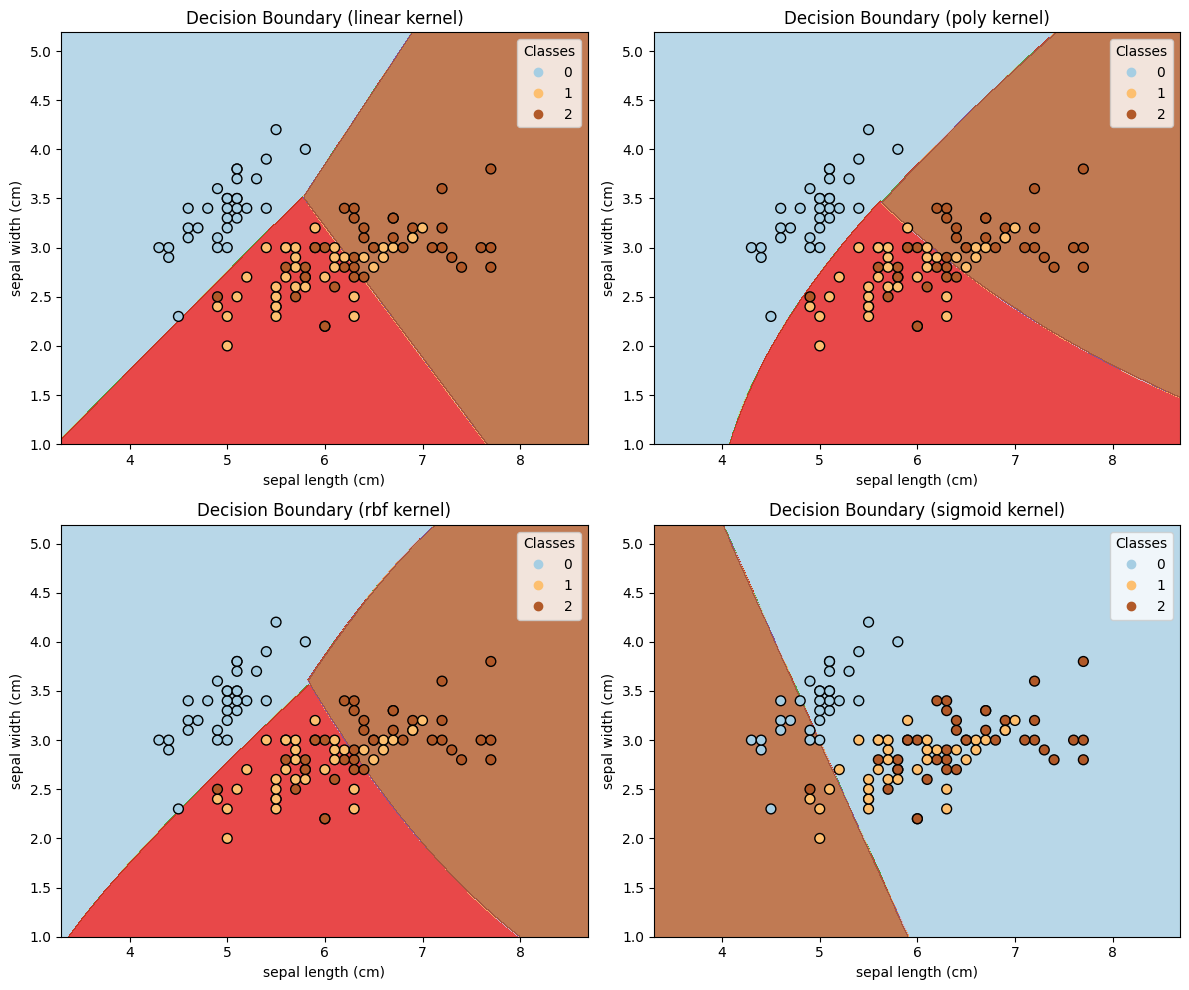

In [1107]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, kernel in enumerate(kernels):
    X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :2], y, test_size=0.3, random_state=42)
    svm_model = SVC(kernel=kernel).fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

    # Decision Boundary Plot
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    axes[idx].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    scatter = axes[idx].scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.Paired, s=50)
    axes[idx].set_title(f"Decision Boundary ({kernel} kernel)")
    axes[idx].set_xlabel(data.feature_names[0])
    axes[idx].set_ylabel(data.feature_names[1])

    # Add legend to each plot
    handles, labels = scatter.legend_elements()
    axes[idx].legend(handles, labels, title="Classes")

plt.tight_layout()
plt.show()

Best Kernel: linear
Accuracy: 100.00%

Matriz de confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



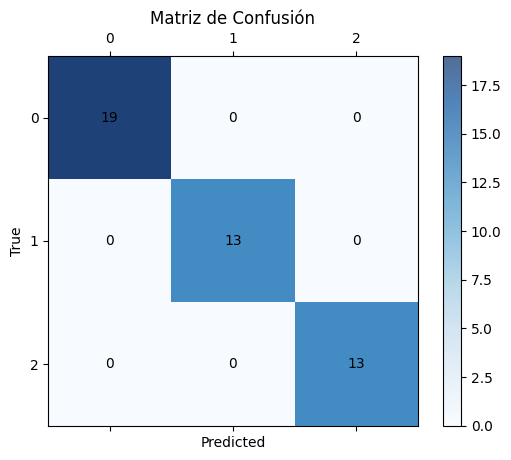

In [1108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_model = SVC(kernel=best_kernel).fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Best Kernel: {best_kernel}')
print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nMatriz de confusión:\n', conf_matrix)
print('\nReporte de clasificación:\n', class_report)

fig, ax = plt.subplots()
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
plt.title("Matriz de Confusión")
plt.colorbar(ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Decision Tree

In [1109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load data
data = load_iris(as_frame=True)
X, y = data.data, data.target

In [1110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=data.target_names)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nClassification Report:')
print(class_report)

Accuracy: 97.78%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



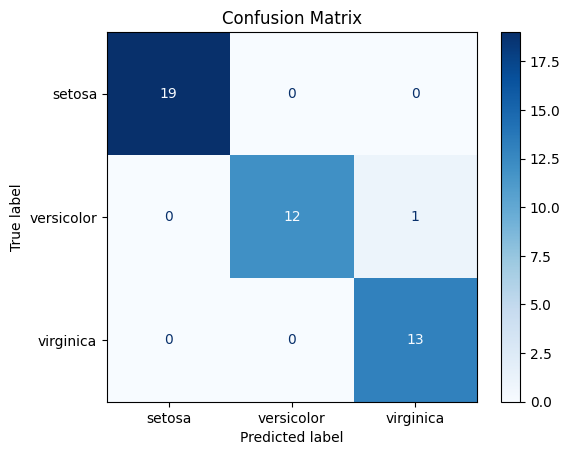

In [1111]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

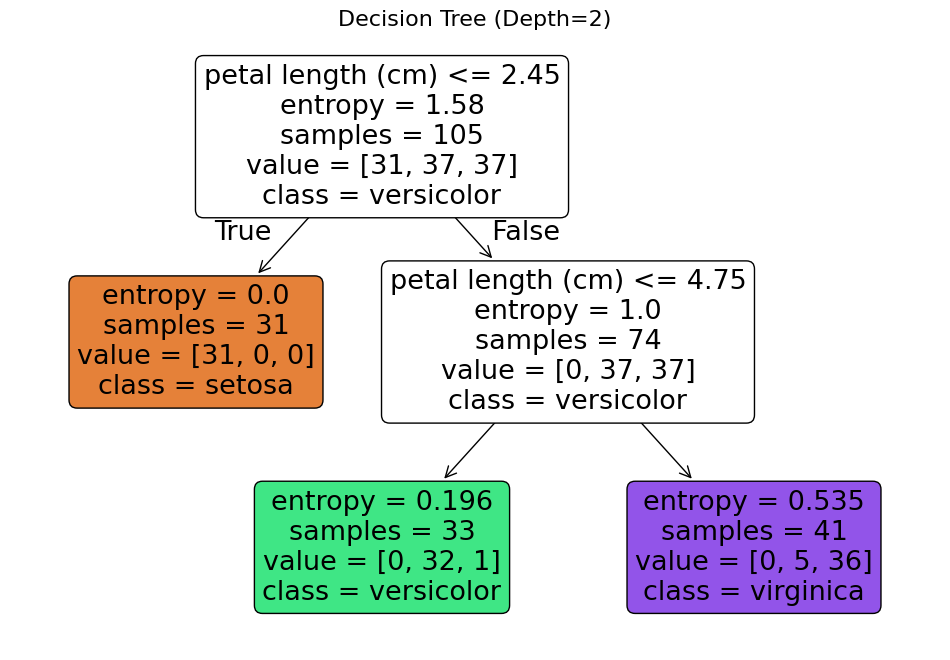

In [1112]:
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=data.target_names, rounded=True, proportion=False)
plt.title("Decision Tree (Depth=2)", fontsize=16)
plt.show()

In [1113]:
depths = range(1, 21)  # Check tree depths from 1 to 20
train_accuracies = []
test_accuracies = []

for depth in depths:
    tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=42)
    tree_model.fit(X_train, y_train)

    # Train and test accuracy
    train_acc = accuracy_score(y_train, tree_model.predict(X_train))
    test_acc = accuracy_score(y_test, tree_model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Find the best depth
best_depth = depths[np.argmin(abs(np.array(test_accuracies) - np.array(train_accuracies)))]

print(f'Best depth: {best_depth}')
print(f'Accuracy at best depth: {test_accuracies[best_depth - 1] * 100:.2f}%')

Best depth: 5
Accuracy at best depth: 97.78%


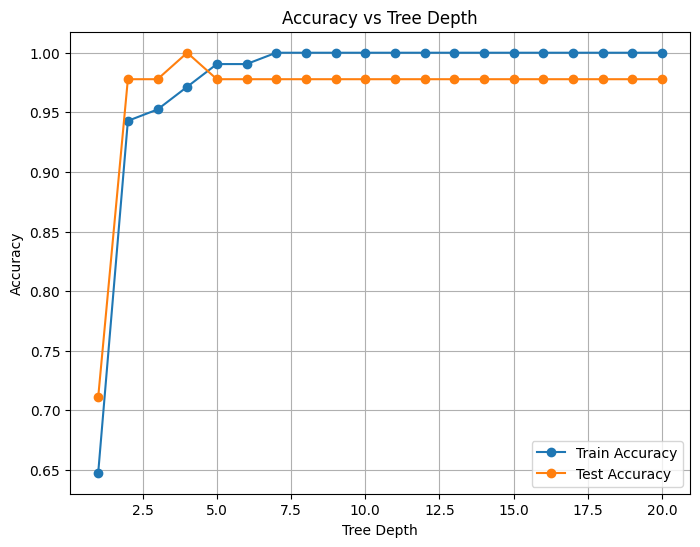

In [1114]:
plt.figure(figsize=(8, 6))
plt.plot(depths, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(depths, test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

In [1115]:
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth, random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

# Accuracy and confusion matrix for the final model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=data.target_names)

print(f'Accuracy at best depth: {accuracy * 100:.2f}%')
print('\nClassification Report:')
print(class_report)

Accuracy at best depth: 97.78%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



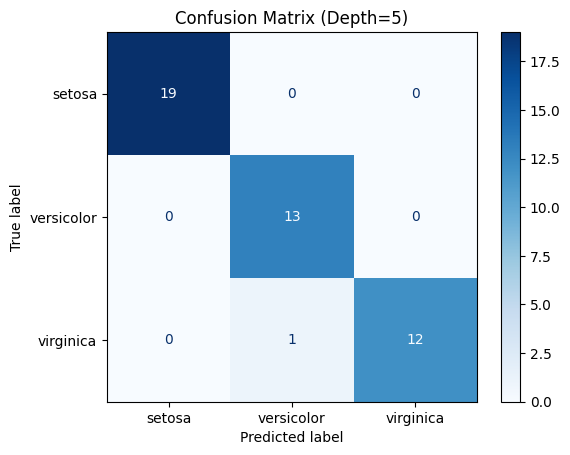

In [1116]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Depth={best_depth})")
plt.show()

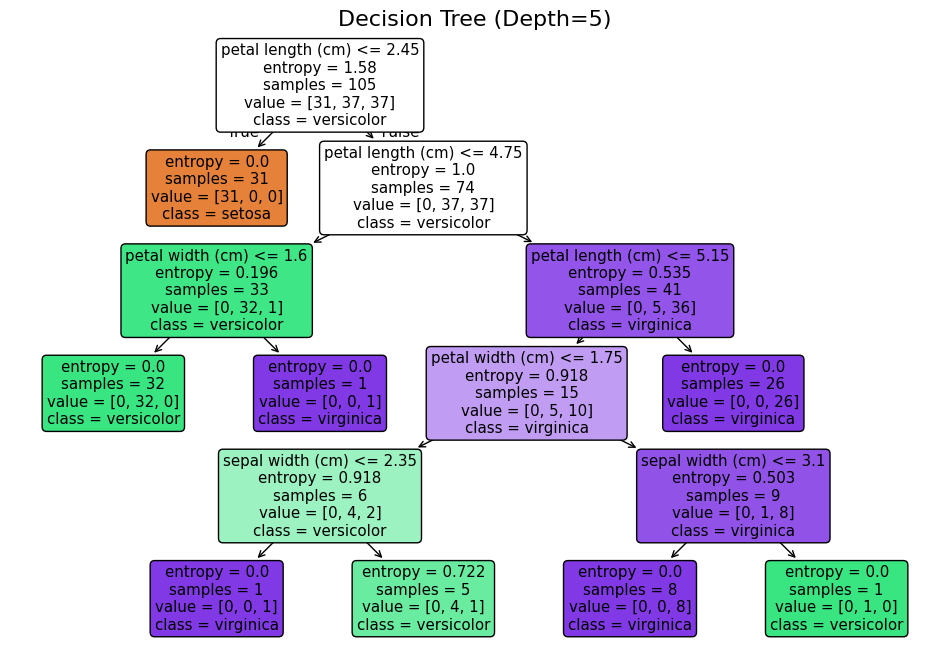

In [1117]:
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=data.target_names, rounded=True, proportion=False)
plt.title(f"Decision Tree (Depth={best_depth})", fontsize=16)
plt.show()

# KNN

In [1118]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [1119]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_knn(k_values):
    results = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_pred = knn.predict(X_train)
        test_pred = knn.predict(X_test)

        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        diff = abs(train_acc - test_acc)

        results.append((k, train_acc, test_acc, diff))
    return results

In [1120]:
results = evaluate_knn(range(1, 21))

best_train = max(results, key=lambda x: x[1])
best_test = max(results, key=lambda x: x[2])
lowest_diff = min(results, key=lambda x: x[3])

optimal_k = lowest_diff[0]
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Store classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)
conf_matrix = confusion_matrix(y_test, y_pred)

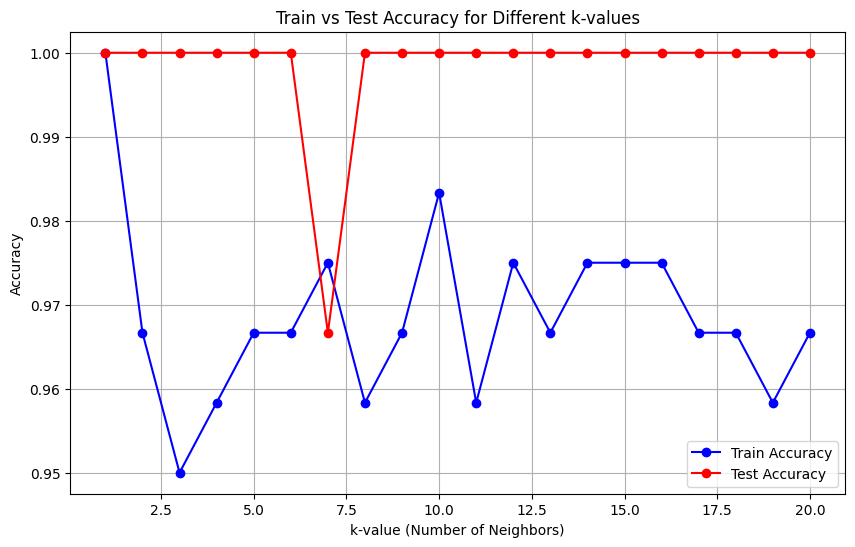

1


In [1121]:
# Plot Accuracy vs. k-value for Train and Test data
k_values = range(1, 21)
train_accuracies = [train_acc for _, train_acc, _, _ in results]
test_accuracies = [test_acc for _, _, test_acc, _ in results]

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o', linestyle='-', color='b')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o', linestyle='-', color='r')
plt.title('Train vs Test Accuracy for Different k-values')
plt.xlabel('k-value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print(optimal_k)

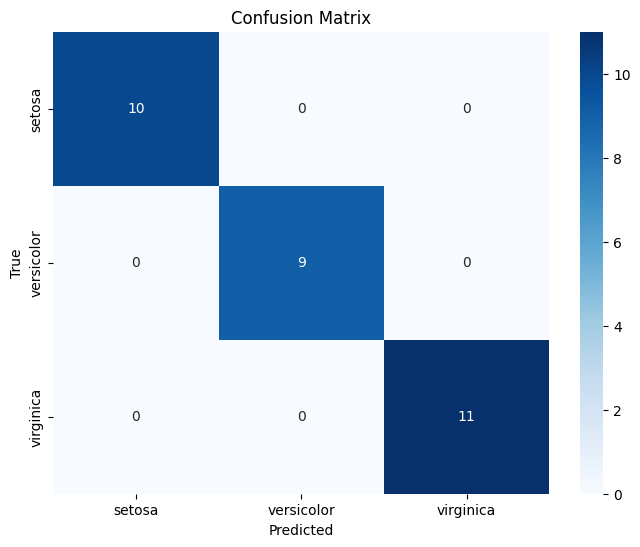

In [1122]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Naïve Bayes

In [1123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1124]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

In [1125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1126]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [1127]:
print(f"Best hyperparameter: {grid_search.best_params_}")

Best hyperparameter: {'var_smoothing': np.float64(0.02310129700083159)}


In [1128]:
best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(X_test)

In [1129]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



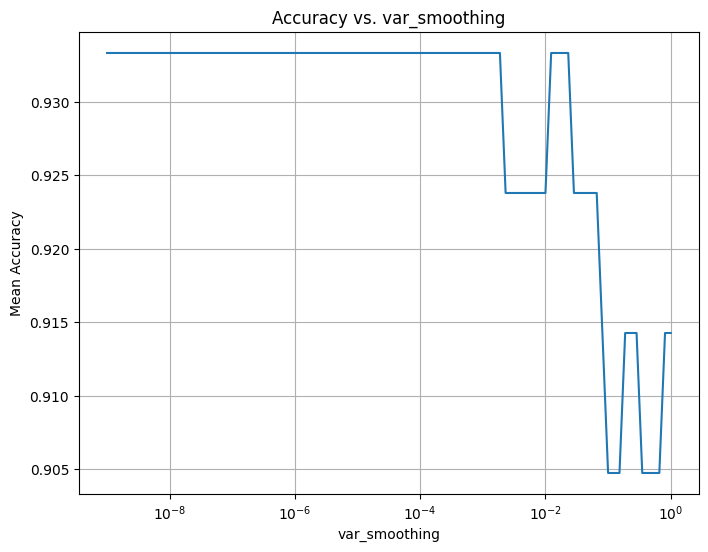

In [1130]:
results = grid_search.cv_results_
plt.figure(figsize=(8, 6))
plt.semilogx(results['param_var_smoothing'], results['mean_test_score'])
plt.xlabel('var_smoothing')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs. var_smoothing')
plt.grid(True)
plt.show()

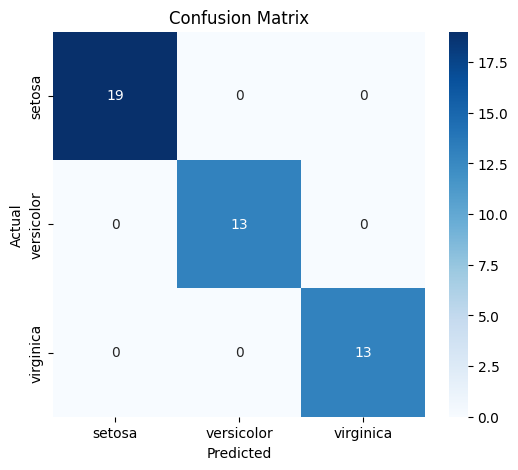

In [1131]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()